
# Processing Of Images

This notebook will process the dataset and save the images into a dedicated folder


## Author: Alexander Goudemond, Student Number: 219030365

# Imports

In [1]:
from os import getcwd, walk, mkdir, stat, remove
from os import sep # used later on, in a function, to print directory contents
from os.path import exists, basename, join

from shutil import copyfile

from PIL.Image import fromarray
import cv2

import matplotlib.pyplot as plt
import numpy as np

# Directories for the Processed of datasets

This section of the notebook will find a way to create directories for the images!

The file order of the dataset is important as we have manually segmented and manually tracked pictures, which we do not plan on processing. We need to find a way to generate the 2 processed datasets without altering this information

An initial option to consider, is generating a list of all the file paths to our images...

This is quite simple, thankfully:

In [2]:
def get_directories(startPath):
    location_array = []
    acceptable_folders = ["\\01", "\\02", "SEG", "TRA"]

    for root, dirs, files in walk(startPath):
        # skip this folder
        if ("OriginalZipped" in root):
            continue

        elif (root[ -3 : ] not in acceptable_folders):
            continue

        location_array.append(root)
    
    return location_array
###

In [3]:
current_directory = getcwd()
desired_directory = "..\\..\\Comp700_DataSets"

In [4]:
path = (current_directory + "\\" + desired_directory)
location_array = get_directories(path)

In [5]:
# first 10
print( location_array[0:10] ) 
print("Number of folders:", len( location_array ) ) 

['c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\01', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_GT\\SEG', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_GT\\TRA', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_ST\\SEG', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\02', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_GT\\SEG', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_GT\\TRA', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_ST\\SEG', 'c:\\Users\\G5\\Documents\\GitHub\\COMP700\\..\\..\\Com

Great! We can use that variable to generate the locations for our processed images! We just need to replace the keyword "Comp700_DataSets" with our desired folder name, and everything else will follow nicely!

We can further improve the folder readability though, by only keeping the Comp700_DataSets etc. :

In [6]:
def cut_string_array(position, array):
    new_array = []

    for item in array:
        new_array.append( item[position : ])
    
    return new_array
###

In [7]:
position = len(current_directory + "\\..\\..\\")
# print(position)

reduced_location_array = cut_string_array(position, location_array)


In [8]:
# first 10
print(reduced_location_array[ 0 : 10])
print("Number of folders:", len( reduced_location_array ) ) 

['Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\01', 'Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_GT\\SEG', 'Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_GT\\TRA', 'Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_ST\\SEG', 'Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\02', 'Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_GT\\SEG', 'Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_GT\\TRA', 'Comp700_DataSets\\Extracted\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_ST\\SEG', 'Comp700_DataSets\\Extracted\\BF-C2DL-HSC (1)\\BF-C2DL-HSC (1)\\01', 'Comp700_DataSets\\Extracted\\BF-C2DL-HSC (1)\\BF-C2DL-HSC (1)\\02']
Number of folders: 96


We are now in a position where we can define a function to replace a keyword in our array, then the rest should be straightforward!

In [9]:
def replace_part_of_array(key_word, new_word, array):
    new_array = []
    temp = ""

    for item in array:
        temp = item.replace(key_word, new_word)
        new_array.append(temp)
    
    return new_array
###

In [10]:
desired_locations_1 = replace_part_of_array("Comp700_DataSets\\Extracted", "Comp700_Processed_DataSets_1", reduced_location_array)

desired_locations_2 = replace_part_of_array("Comp700_DataSets\\Extracted", "Comp700_Processed_DataSets_2", reduced_location_array)

In [11]:
print( desired_locations_1[0:10] )
print("Number of folders:", len( desired_locations_1 ) ) 

['Comp700_Processed_DataSets_1\\BF-C2DL-HSC\\BF-C2DL-HSC\\01', 'Comp700_Processed_DataSets_1\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_GT\\SEG', 'Comp700_Processed_DataSets_1\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_GT\\TRA', 'Comp700_Processed_DataSets_1\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_ST\\SEG', 'Comp700_Processed_DataSets_1\\BF-C2DL-HSC\\BF-C2DL-HSC\\02', 'Comp700_Processed_DataSets_1\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_GT\\SEG', 'Comp700_Processed_DataSets_1\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_GT\\TRA', 'Comp700_Processed_DataSets_1\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_ST\\SEG', 'Comp700_Processed_DataSets_1\\BF-C2DL-HSC (1)\\BF-C2DL-HSC (1)\\01', 'Comp700_Processed_DataSets_1\\BF-C2DL-HSC (1)\\BF-C2DL-HSC (1)\\02']
Number of folders: 96


In [12]:
print( desired_locations_2[0:10] )
print("Number of folders:", len( desired_locations_2 ) ) 

['Comp700_Processed_DataSets_2\\BF-C2DL-HSC\\BF-C2DL-HSC\\01', 'Comp700_Processed_DataSets_2\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_GT\\SEG', 'Comp700_Processed_DataSets_2\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_GT\\TRA', 'Comp700_Processed_DataSets_2\\BF-C2DL-HSC\\BF-C2DL-HSC\\01_ST\\SEG', 'Comp700_Processed_DataSets_2\\BF-C2DL-HSC\\BF-C2DL-HSC\\02', 'Comp700_Processed_DataSets_2\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_GT\\SEG', 'Comp700_Processed_DataSets_2\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_GT\\TRA', 'Comp700_Processed_DataSets_2\\BF-C2DL-HSC\\BF-C2DL-HSC\\02_ST\\SEG', 'Comp700_Processed_DataSets_2\\BF-C2DL-HSC (1)\\BF-C2DL-HSC (1)\\01', 'Comp700_Processed_DataSets_2\\BF-C2DL-HSC (1)\\BF-C2DL-HSC (1)\\02']
Number of folders: 96


Okay! We now have 2 variables containing the folder locations! We can now define some functions to validate all directories exist

In [13]:
# create directory for work we create
def tryMakeDirectory(current_directory, destination_directory):
    try:
        # join comes from os.path
        mkdir( join(current_directory, destination_directory) )
    except FileExistsError:
        # print("Folder already exists!")
        pass
    except:
        print("Unknown Error Encountered...")
###

def createBulkDirectories(current_directory, array):
    sub_folders = []
    path = "..\\..\\"

    for item in array:
        sub_folders = item.split("\\")
        # print(sub_folders)

        for folder in sub_folders:
            path += folder
            tryMakeDirectory(current_directory, path)
            path += "\\"
        
        # reset
        path = "..\\..\\"

    print("Done!")
###

In [14]:
createBulkDirectories(current_directory, desired_locations_1)

Done!


In [15]:
createBulkDirectories(current_directory, desired_locations_2)

Done!


# dataset Processing

This section of the notebook focusses on processing the entire dataset, following the methods found in 005 for 1103_10 and 1103_11

We need 2 functions, 1 for 1103_10 and the other for 1103_11:

In [16]:
def getImage(filePath):
    img = plt.imread(filePath) 
    plt.imsave("temp.jpg", img, cmap="gray") # desired colourmap for us
    img = cv2.imread( "temp.jpg", cv2.IMREAD_GRAYSCALE)

    return img
###

def increase_brightness(img, value=30):
    newImg = img.copy()

    maxVal = np.amax(newImg)
    lim = maxVal - value

    # do not increase largest values
    newImg[newImg > lim] = 255

    # increase rest
    newImg[newImg <= lim] += value

    # do not increase lowest values
    # minVal = np.amin(i)
    # newImg[newImg == minVal + value] = minVal

    # attempt to keep smallest values at minVal
    # minVal = np.amin(i)
    # lim = minVal + value
    # newImg[newImg <= lim] = minVal
    
    return newImg
###

def processOne(image, kernel):
    brighter_img = increase_brightness(image, 15)

    img_changed = cv2.dilate(brighter_img, kernel, iterations=1)

    img_erode = cv2.erode(img_changed, kernel, iterations=1)
    img_opened = cv2.dilate(img_erode, kernel, iterations=1)

    return img_opened
###

def processTwo(image, kernel):
    brighter_img = increase_brightness(image, 15)

    img_erode = cv2.erode(brighter_img, kernel, iterations=1)
    img_opened = cv2.dilate(img_erode, kernel, iterations=1)

    img_changed = cv2.erode(img_opened, kernel, iterations=1)

    return img_changed
###

# process choice influences processOne or processTwo
def bulkProcess(current_directory, original_dataset, location_array, process_choice):
    kernel = np.ones((3,3), np.uint8)
    counter = 0
    valid_folders = ["01", "02", "SEG", "TRA"]

    if (process_choice == 1):
        name = "processed1_"
    else:
        name = "processed2_"

    # go to the original_dataset
    path = walk(current_directory + "\\" + original_dataset)

    for root, dirs, files in path:
        # skip zipped files
        if ("OriginalZipped" in root):
            continue
        # end loop because locations exhausted
        elif (counter >= len(location_array)):
            break

        # print(root)

        for item in files:
            # manual info, simply copy as is
            if ("man_" in item):
                # print("Counter:", counter)
                img_path = current_directory + "\\..\\..\\" + location_array[counter] + "\\" +  item
                # print(img_path)

                # handle text files
                if (".txt" in item):
                    copyfile(root + "\\" + item, img_path)
                else:
                    # print("EISH")
                    # write as PNG! not JPG
                    img = plt.imread(root + "\\" + item) 
                    filename = img_path[ : -3] + "png"
                    plt.imsave(filename, img, cmap="gray") # desired colourmap for us
                

                
            # stop working, zipped files found
            elif (".zip" in item):
                break
            else:
                # print("Nope")

                img = getImage(root + "\\" + item)

                if (process_choice == 1):
                    processed_pic = processOne(img, kernel)
                else:
                    processed_pic = processTwo(img, kernel)

                # print("Counter:", counter)
                img_path = current_directory + "\\..\\..\\" + location_array[counter] + "\\" + name + item
                # print(img_path)

                cv2.imwrite(img_path, processed_pic)

            # remove later
            # break
        
        # update counter
        if (basename(root) in valid_folders):
            counter += 1
    
    # remove at end
    if (exists("temp.jpg")):
        remove("temp.jpg")
### 

def getFileQuantities(path):
    count = 0
    size_array = []
    valid_folders = ["01", "02", "SEG", "TRA"]

    for root, dirs, files in walk(path):
        count = 0

        for file in files:
            count += 1
        
        if (basename(root) in valid_folders):
            size_array.append(count)
    
    return size_array
###

We next need to verify all of those files have been processed correctly:

In [17]:
original_sizes = getFileQuantities( current_directory + "\\" + "..\\..\\Comp700_DataSets" )

In [18]:
original_sizes

[1764,
 49,
 1765,
 1764,
 1764,
 8,
 1765,
 1764,
 1763,
 1763,
 1375,
 50,
 1377,
 1376,
 1376,
 50,
 1377,
 1376,
 1376,
 1375,
 84,
 9,
 85,
 84,
 84,
 9,
 85,
 84,
 115,
 115,
 30,
 8,
 31,
 30,
 5,
 31,
 30,
 30,
 48,
 18,
 49,
 48,
 48,
 33,
 49,
 48,
 48,
 48,
 92,
 30,
 93,
 92,
 92,
 20,
 93,
 92,
 92,
 92,
 65,
 65,
 66,
 150,
 150,
 151,
 110,
 138,
 92,
 28,
 93,
 92,
 92,
 8,
 93,
 92,
 92,
 92,
 115,
 15,
 116,
 115,
 115,
 19,
 116,
 115,
 115,
 115,
 300,
 2,
 301,
 300,
 300,
 2,
 301,
 300,
 300,
 300]

In [21]:
processed1_sizes = getFileQuantities( current_directory + "\\" + "..\\..\\Comp700_Processed_DataSets_1" )

if (original_sizes == processed1_sizes):
    print("True")
else:
    print("False")
    print("\nGenerating now")
    bulkProcess(current_directory, "..\\..\\Comp700_DataSets", desired_locations_1, 1)

True


In [22]:
processed2_sizes = getFileQuantities( current_directory + "\\" + "..\\..\\Comp700_Processed_DataSets_2" )

if (original_sizes == processed2_sizes):
    print("True")
    
else:
    print("False")
    print("\nGenerating now")
    bulkProcess(current_directory, "..\\..\\Comp700_DataSets", desired_locations_2, 2)

True


Okay! We should now have 2 folders outside this directory containing the altered images.

Recall that in 005, Videos showing the Opened Videos were created - however these videos used a negative image of the Opened images, to better impart human visibility.

We next desire to open the first 10 images from the 2 folders, and recreate the stitched pictures to validate that the work is consistent.

# Validation of Processing Steps

This section of the notebook focusses on verifying that the bulk processing steps match the work done in 005

First, let us navigate to the desired locations and generate objects for the 10 images we want:

In [ ]:
'''
We only need to show every _OTHER_ folder, as each dataset has a 
 training and challenge set. So out of 20 files, we need to show 10

First things first, let us create an array of the directory locations
'''

data_sets = "..\\..\\Comp700_DataSets"
current_directory = getcwd()

path = walk(current_directory + "\\" + data_sets)

directory_array = [] # contains the main folders

i = 1
for root, dirs, files in path:
    if (i == 2):
        directory_array = dirs
        break
    
    i += 1

print("Directory Array")
print(directory_array)


Directory Array
['BF-C2DL-HSC', 'BF-C2DL-HSC (1)', 'BF-C2DL-MuSC', 'BF-C2DL-MuSC (1)', 'DIC-C2DH-HeLa', 'DIC-C2DH-HeLa (1)', 'Fluo-C2DL-Huh7', 'Fluo-C2DL-Huh7 (1)', 'Fluo-C2DL-MSC', 'Fluo-C2DL-MSC (1)', 'Fluo-N2DH-GOWT1', 'Fluo-N2DH-GOWT1 (1)', 'Fluo-N2DH-SIM+', 'Fluo-N2DH-SIM+ (1)', 'Fluo-N2DL-HeLa', 'Fluo-N2DL-HeLa (1)', 'PhC-C2DH-U373', 'PhC-C2DH-U373 (1)', 'PhC-C2DL-PSC', 'PhC-C2DL-PSC (1)']


In [ ]:

def getFirstTenPics(desired_directory, directory_array):
    # Now, generate the array of images
    test_images = []

    path = walk(getcwd() + "\\" + desired_directory)

    i = -1
    temp = -1
    for root, dirs, files in path:
        # print(dirs)
        for item in files:
            # only execute for first picture in directory
            if ("t0000.tif" in item) or ("t000.tif" in item):
                i += 1

                # skips folder "02" in datasets
                if (i % 2 == 1):
                    break
                    
                # print(i)
                temp = i // 2

                # skip Challenge datasets
                if ("(1)" in directory_array[temp]):
                    break

                location = ( current_directory + "\\" + desired_directory + "\\" + directory_array[temp] + 
                            "\\" + directory_array[temp] + "\\01\\" + item)
                # print(location)

                img = cv2.imread(location, cv2.IMREAD_GRAYSCALE)

                test_images.append(img) # place into array

                break

            else:
                break
            
    return resizeImageArray(test_images)
###

def resizeImageArray(image_array):
    new_array = []
    x = -1; y = -1

    for i in range(len(image_array)):
        img = image_array[i]

        if (i == 0):
            (x, y) = img.shape
            x = x // 2
            y = y // 2
        
        img_reshaped = cv2.resize(img, (x, y))
        new_array.append(img_reshaped)
    
    return new_array
###


In [ ]:
location1 = "..\\..\\Comp700_Processed_DataSets_1"
location1_pics = getFirstTenPics(location1, directory_array)

print( len(location1_pics) )

10


In [67]:
location2 = "..\\..\\Comp700_Processed_DataSets_2"
location2_pics = getFirstTenPics(location2, directory_array)

print( len(location1_pics) )

10


We can now stitch them together and save them:

In [68]:
# from PIL.Image import fromarray

def stitchTogetherPics(array_of_images):
    # top level
    myList = (array_of_images[0], array_of_images[1], array_of_images[2], array_of_images[3], array_of_images[4])
    numpy_horizontal_top = np.hstack(myList)

    # bottom level
    myList = (array_of_images[5], array_of_images[6], array_of_images[7], array_of_images[8], array_of_images[9])
    numpy_horizontal_bottom = np.hstack(myList)

    # stick 2 ontop of one another
    myList = (numpy_horizontal_top, numpy_horizontal_bottom)
    numpy_final_pic_concat = np.concatenate(myList, axis=0)

    return numpy_final_pic_concat

# save and show in cell
def saveAndShow(desired_directory, image_array, picName):
    fileName = desired_directory + "\\" + picName

    # Save pic to file, using Pillow!
    new_img = fromarray(stitchTogetherPics(image_array))
    new_img.save(fileName) # save using Pillow

    width = 30
    height = 10
    fig = plt.figure()
    fig.set_figwidth(width); fig.set_figheight(height)

    new_img = plt.imread(fileName)
    plt.title(picName)
    plt.axis('off')
    plt.imshow(new_img, cmap='gray')

In [71]:
destination_directory = "006_Processed_Pics"
tryMakeDirectory(current_directory, destination_directory)

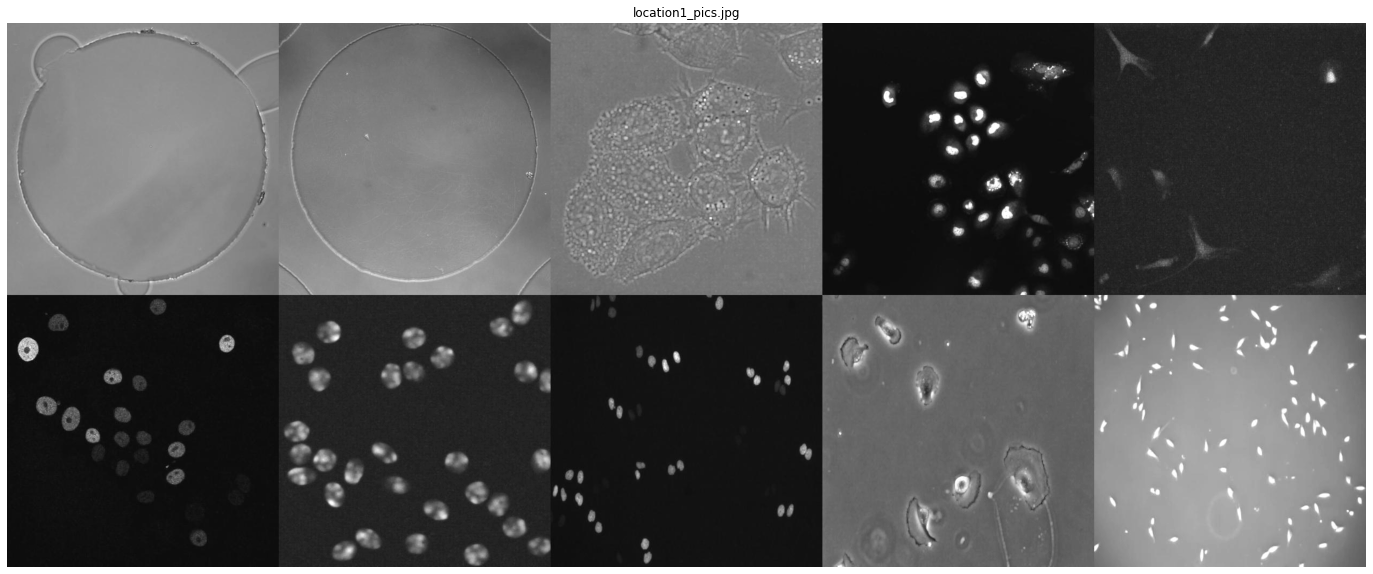

In [72]:
saveAndShow(destination_directory, location1_pics, "location1_pics.jpg")

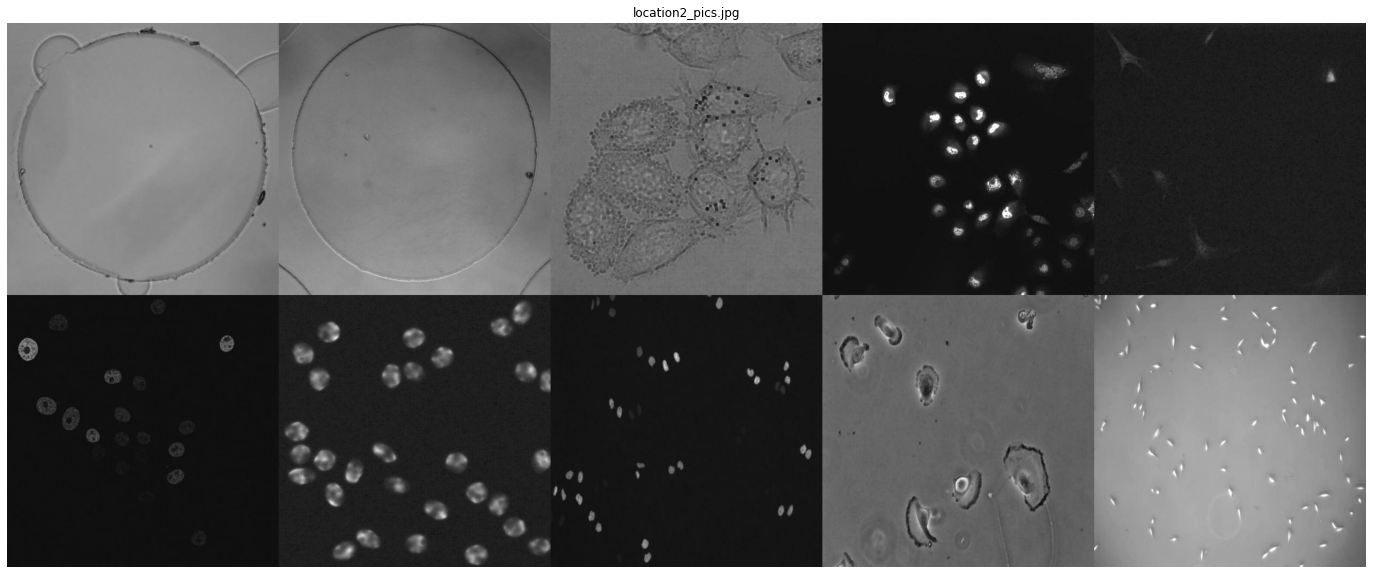

In [73]:
saveAndShow(destination_directory, location2_pics, "location2_pics.jpg")

Next steps! Let ys read in the 2 images from the 005 folder, as well as the 2 images from the 006 folder and confirm:

![1103_10](005_SecondaryPre-Processing\1103_10_Brighten15_Dilated_Opened_Images.png "1103_10")

![locations1_pics](006_Processed_Pics\location1_pics.jpg "locations1_pics")

![1103_11](005_SecondaryPre-Processing\1103_11_Brighten15_Opened_Eroded_Images.png "1103_11")

![locations2_pics](006_Processed_Pics\location2_pics.jpg "locations2_pics")

The pictures match! There is a strange resize issue though, the new stitched images appear to be a square shape, even though the code is identical... but other than that, the processing is complete!

Next, we need to create a notebook 007 to begin the segmentation steps!

# Conclusion

This section of the notebook focusses on the findings of 006

The processing steps were successful, and the 2 processing steps conducted are successful! In the next notebook, we will explore segmentation options to see what techniques are worth using.

This was stated elsewhere, but the reason we need to save the images and video outside the Github directory is because of file size. The videos alone are quite large, but the processed pictures are individually ~5GB in size (The original is ~15GB)

Provided that the segmentation steps are successful, we may be able to avoid returning here. Hopefully the morphological operations are sufficient!